In [135]:
import pandas as pd
import numpy as np

In [136]:
import seaborn as sns

In [137]:
%matplotlib inline

In [138]:
import matplotlib.pyplot as plt

In [139]:
# Importing Housing.csv
housing = pd.read_csv('Housing.csv')

In [140]:
type(housing)

pandas.core.frame.DataFrame

In [141]:
pwd

'C:\\Users\\fadteana\\Desktop\\Python Bootcamp'

In [142]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [143]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no
541,1767150,2400,3,1,1,no,no,no,no,no,0,no
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no
543,1750000,2910,3,1,1,no,no,no,no,no,0,no
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no


In [144]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   basement         545 non-null    object
 8   hotwaterheating  545 non-null    object
 9   airconditioning  545 non-null    object
 10  parking          545 non-null    int64 
 11  prefarea         545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [145]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [146]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [147]:
# Now let's see the head
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


#### Creating a new variable

In [148]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [149]:
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

In [150]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1855.0,0.250000


In [151]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
housing = housing.apply(normalize) 

In [152]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.237016,0.1


In [153]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'areaperbedroom', 'bbratio'],
      dtype='object')

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

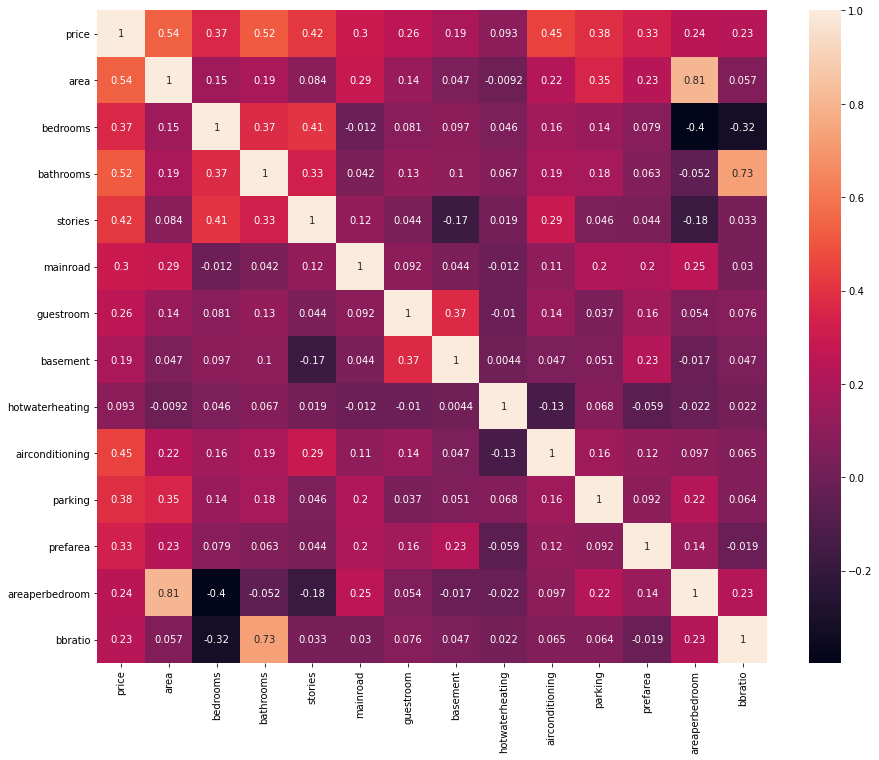

In [155]:
plt.figure(figsize = (15,12))     # 
sns.heatmap(housing.corr(),annot = True)

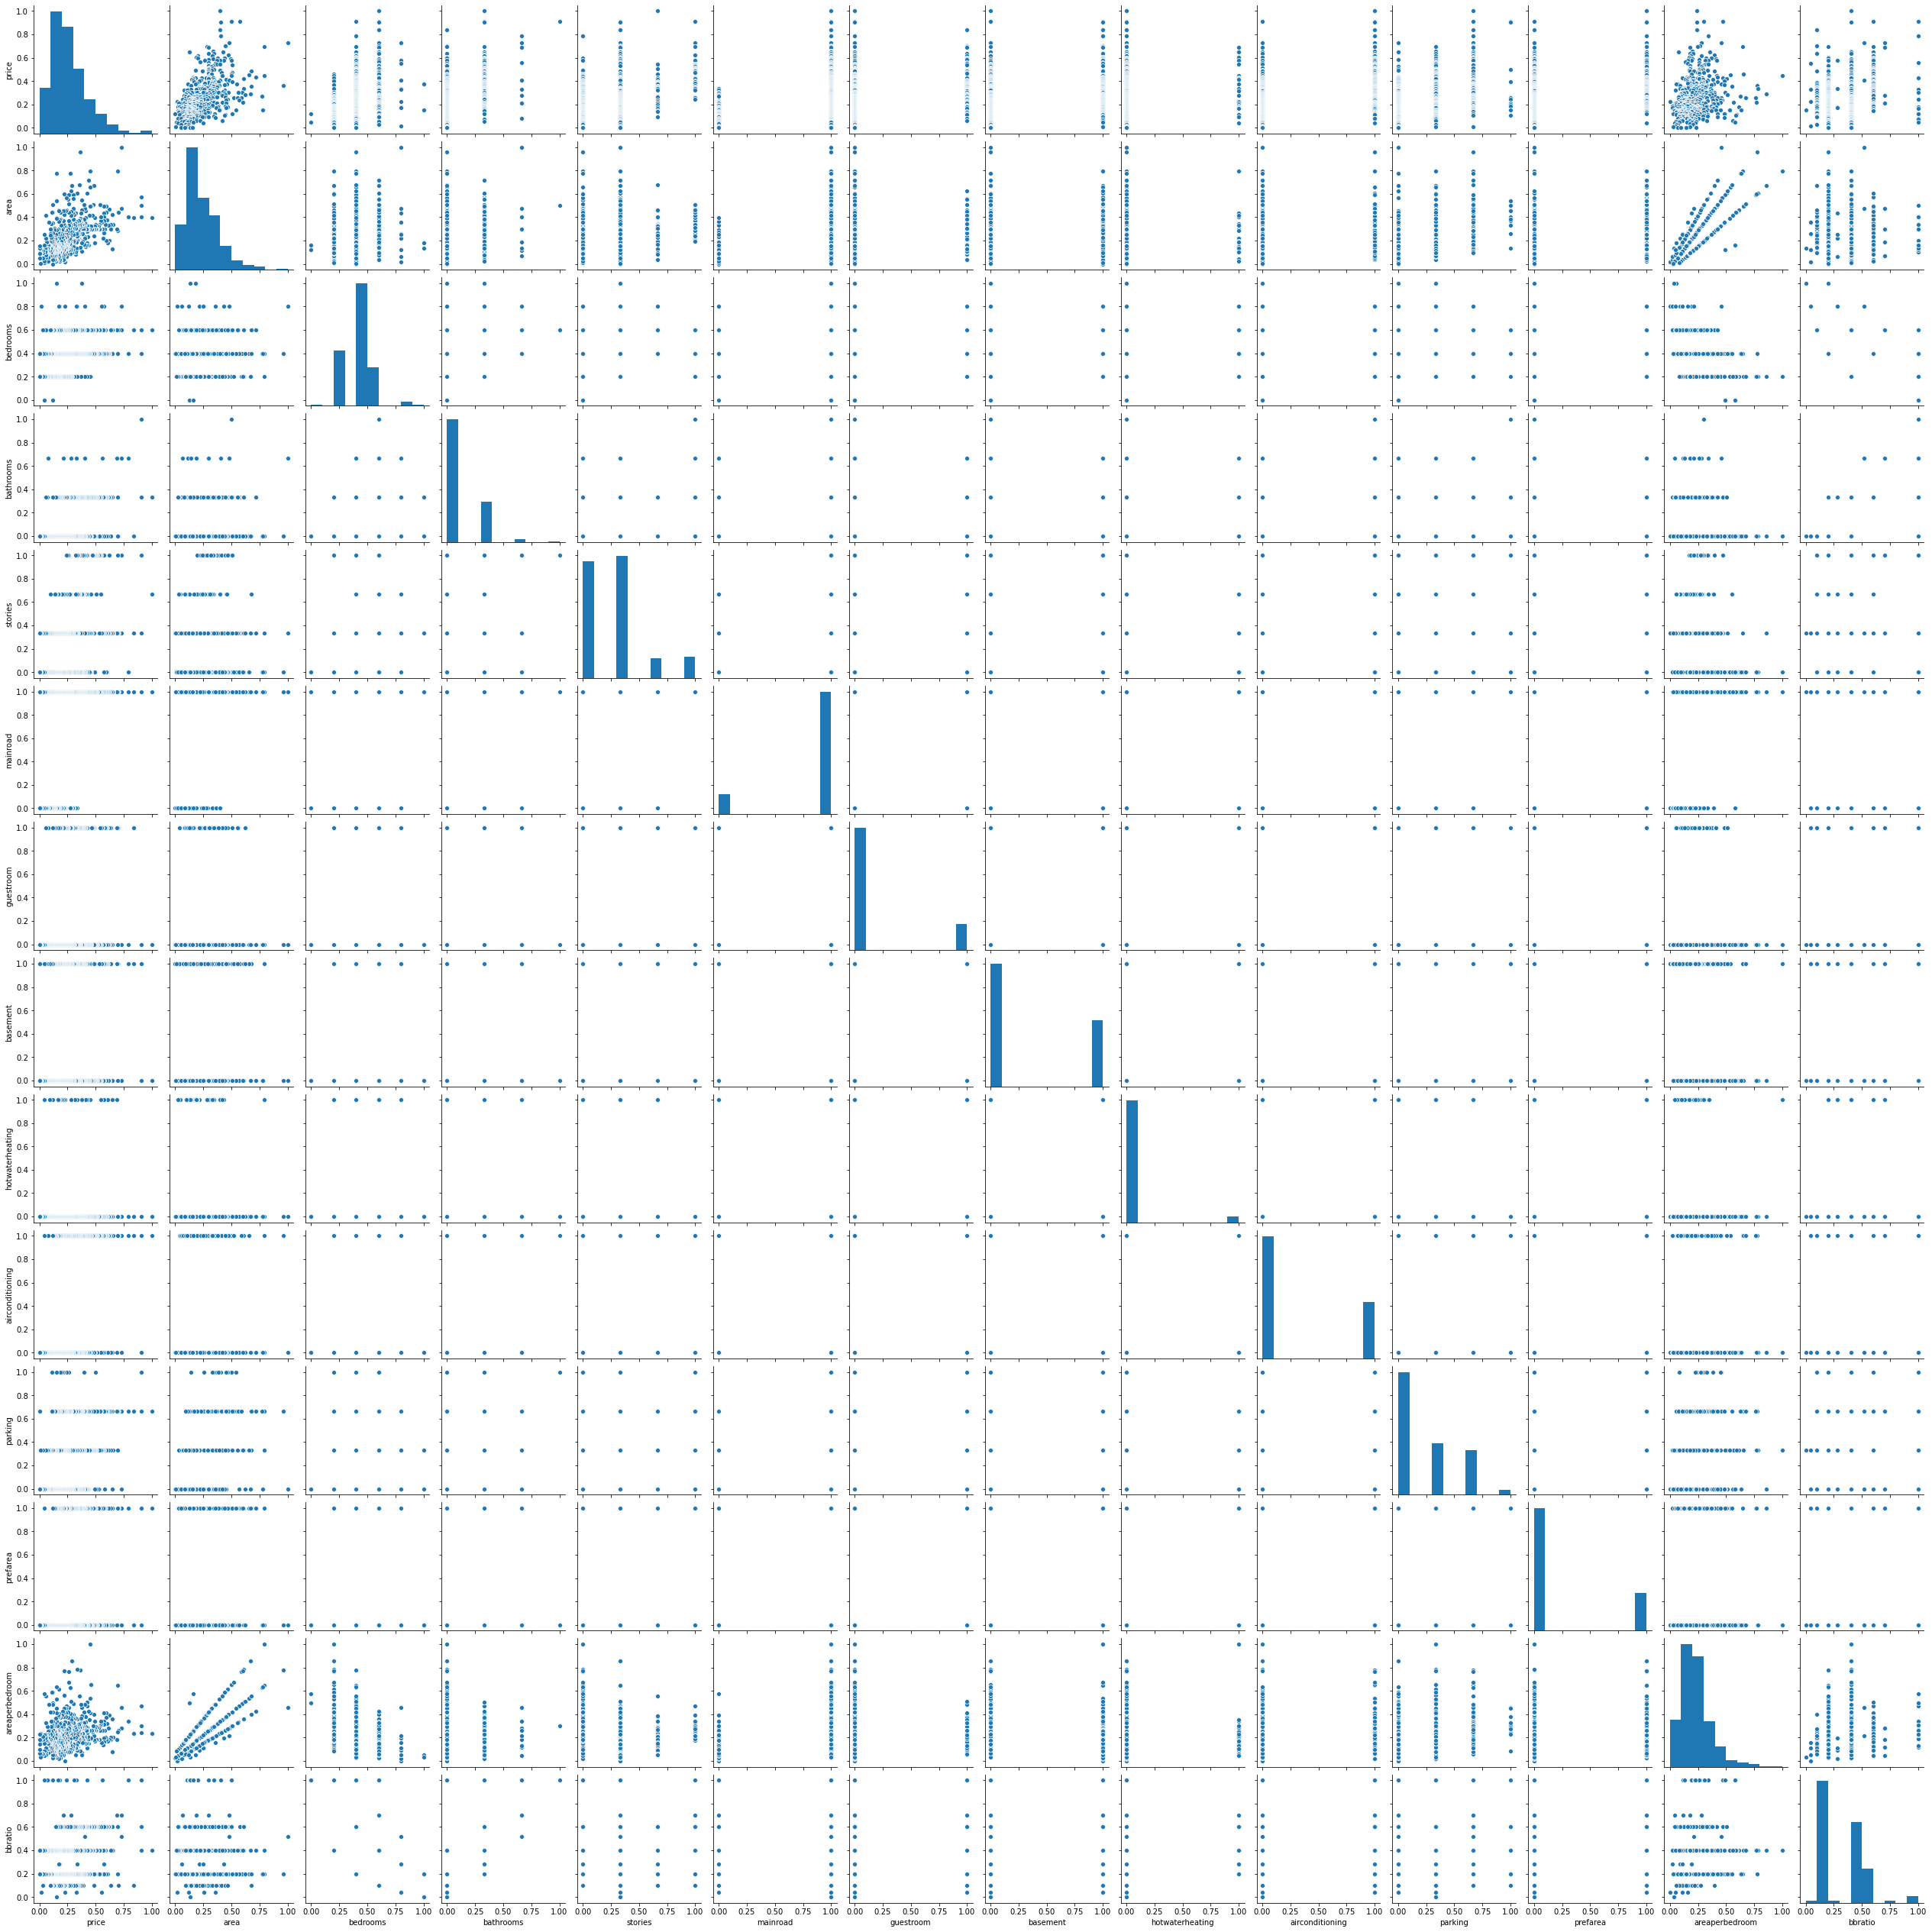

In [156]:
sns.pairplot(housing)

In [157]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 
       'areaperbedroom','bbratio']]

# Putting response variable to y
y = housing['price']

In [158]:
from sklearn import datasets

In [159]:
from sklearn import svm

In [160]:
from sklearn import datasets

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
#random_state is the seed used by the random number generator, it can be any integer.
#from sklearn.cross_decomposition import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

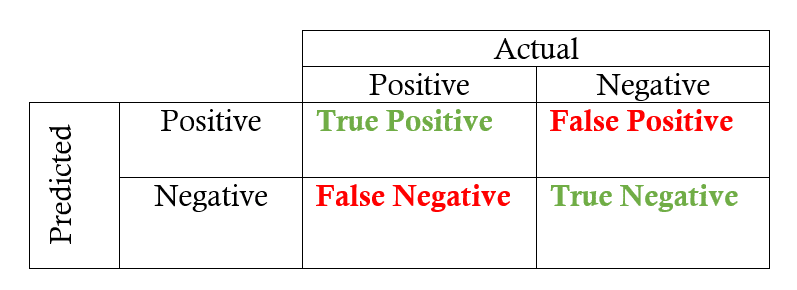

In [163]:
import statsmodels.api as sm          
X_train = sm.add_constant(X_train)    
lm_1 = sm.OLS(y_train,X_train).fit()

In [164]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           8.77e-82
Time:                        09:32:50   Log-Likelihood:                 379.37
No. Observations:                 381   AIC:                            -730.7
Df Residuals:                     367   BIC:                            -675.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0405      0.058     

In [165]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [166]:
# Calculating Vif value
vif_cal(input_data=housing, dependent_col="price")

,Var,Vif
11,areaperbedroom,68.58
0,area,57.45
12,bbratio,26.88
2,bathrooms,10.22
1,bedrooms,8.96
4,mainroad,7.89
3,stories,2.80
6,basement,2.03
9,parking,1.99
8,airconditioning,1.75


### Dropping the Variable and Updating the Model

In [167]:
X_train = X_train.drop('bbratio', 1)

In [168]:
lm_2 = sm.OLS(y_train,X_train).fit()

In [169]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     64.36
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.15e-82
Time:                        09:32:50   Log-Likelihood:                 379.30
No. Observations:                 381   AIC:                            -732.6
Df Residuals:                     368   BIC:                            -681.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0583      0.034     

In [170]:
vif_cal(input_data=housing.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,18.37
11,areaperbedroom,15.43
1,bedrooms,7.44
4,mainroad,7.44
3,stories,2.78
6,basement,2.02
9,parking,1.99
8,airconditioning,1.75
2,bathrooms,1.71
10,prefarea,1.51


In [171]:
X_train = X_train.drop('bedrooms', 1)

In [172]:
lm_3 = sm.OLS(y_train,X_train).fit()

In [173]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     70.07
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.39e-83
Time:                        09:32:50   Log-Likelihood:                 378.69
No. Observations:                 381   AIC:                            -733.4
Df Residuals:                     369   BIC:                            -686.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0255      0.015     

In [174]:
vif_cal(input_data=housing.drop(["bbratio","bedrooms"], axis=1), dependent_col="price")

,Var,Vif
0,area,14.82
10,areaperbedroom,13.29
3,mainroad,5.42
2,stories,2.50
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.69
9,prefarea,1.50
4,guestroom,1.47


In [176]:
# drop non related variable
X_train = X_train.drop('basement', 1)

In [177]:
lm_4 = sm.OLS(y_train,X_train).fit()

In [178]:
#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     76.10
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.81e-83
Time:                        09:36:52   Log-Likelihood:                 376.69
No. Observations:                 381   AIC:                            -731.4
Df Residuals:                     370   BIC:                            -688.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0327      0.014     

In [179]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bbratio","bedrooms","basement"], axis=1), dependent_col="price")

,Var,Vif
0,area,14.81
9,areaperbedroom,13.28
3,mainroad,5.12
2,stories,2.39
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.66
8,prefarea,1.45
4,guestroom,1.29
5,hotwaterheating,1.08


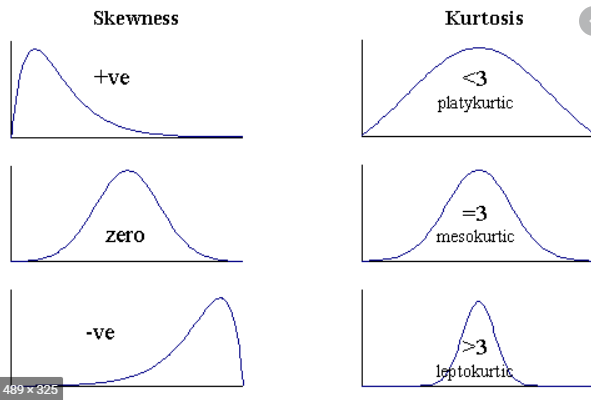


### Prediction with Model 4

In [180]:
# Adding  constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [181]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m4 = X_test_m4.drop(["bedrooms","bbratio","basement"], axis=1)

In [182]:
# Making predictions
y_pred_m4 = lm_4.predict(X_test_m6)

In [183]:
print(y_pred_m4)

265    0.203551
54     0.433657
171    0.355673
244    0.292375
268    0.269858
         ...   
413    0.280675
191    0.348580
310    0.179545
46     0.458901
50     0.481768
Length: 164, dtype: float64


In [193]:
from sklearn import metrics

In [194]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_m4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_m4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m4)))

MAE: 0.07624071027532509
MSE: 0.010372553440017402
RMSE: 0.10184573353860928


In [195]:
# Predicting the results

Text(0, 0.5, 'Housing Price')

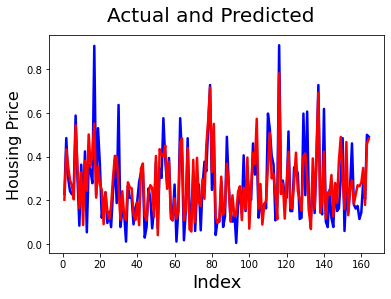

In [196]:
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")  #
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Housing Price', fontsize=16)                       

In [191]:
import matplotlib.pyplot as plt


In [197]:
# Plot error terms